## Supervised learning assignemtn
##### Name: Daan Steur
##### Studentnumber: 379943
##### Supervisor: Drs. Bart Barnard
##### Course: DSLS Data Science 3: Supervised learning
##### Date: 27th of may

### Prediction of health parameters based on patient informatio. 

#### Assignment 
Load, inspect and clean the data. Split the data into a training set and a validation set and a test set. Use a simple classifier as a baseline. Train various classifiers. Motivate your choice in relation to the characteristics of the dataset. Try to combine them into an ensemble learning model that outperforms all of the others

#### Background


#### Data
Blood Pressure Data for disease Prediction
Patient_Number
 - Blood_Pressure_Abnormality
 - Level_of_Hemoglobin
 - Genetic_Pedigree_Coefficient
 - Age
 - BMI
 - Sex
 - Pregnancy
 - Smoking
 - Physical_activity
 - salt_content_in_the_diet
 - alcohol_consumption_per_day
 - Level_of_Stress
 - Chronic_kidney_disease
 - Adrenal_and_thyroid_disorders

Data & packages

In [1]:
# load packages
# base
import pandas as pd
import numpy as np
import collections
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
# stats
import scipy.stats as stats
import statsmodels.api as sm
from exploration import *
# Modeling
from sklearn import linear_model, metrics, tree, preprocessing
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report

In [4]:
# load data
data = pd.read_csv("data.csv")
# drop parient ids
data.drop(['Patient_Number'], axis=1, inplace=True)
# reoreder columns
data = data[["Blood_Pressure_Abnormality",
            "Chronic_kidney_disease",
             "Adrenal_and_thyroid_disorders",
             "Level_of_Hemoglobin",
             "Genetic_Pedigree_Coefficient",
             "Age",
             "BMI",
             "Sex",
             "Pregnancy",
             "Smoking",
             "Physical_activity",
             "salt_content_in_the_diet",
             "alcohol_consumption_per_day",
             "Level_of_Stress",
]]

data["Sex"] =  data["Sex"].replace({1: "Male", 0: "Female"})
data.head()

,Blood_Pressure_Abnormality,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress
0,1,1,1,11.28,0.90,34,23,Male,1.0,0,45961,48071,NaN,2
1,0,0,0,9.75,0.23,54,33,Male,NaN,0,26106,25333,205.0,3
2,1,1,0,10.79,0.91,70,49,Female,NaN,0,9995,29465,67.0,2
3,0,1,0,11.00,0.43,71,50,Female,NaN,0,10635,7439,242.0,1
4,1,0,0,14.17,0.83,52,19,Female,NaN,0,15619,49644,397.0,2


Data Exploration (EDA)

c:\Users\31613\Desktop\Git repositories\DSLS-DS3-Machine-learning\Supervised-learning\exploration.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.sort_index(axis=1, inplace=True, key=lambda x: x.str.lower())


                             N Obs    N Missing    N Valid    % Complete    N Unique      Mean        SD    Median       MAD    Min       Max    Skewness    Kurtosis  CV
-------------------------  -------  -----------  ---------  ------------  ----------  --------  --------  --------  --------  -----  --------  ----------  ----------  ----
Age                           2000            0       2000         100            58     46.56     17.11     46        22.24   18       75           0.02       -1.25  0.37
alcohol_consumption_per_d     2000          242       1758          87.9         488    251.01    143.65    250       186.81    0      499          -0.01       -1.22
BMI                           2000            0       2000         100            41     30.08     11.76     30        14.83   10       50          -0.02       -1.18  0.39
Genetic_Pedigree_Coeffici     2000           92       1908          95.4         101      0.49      0.29      0.49      0.37    0        1          

<AxesSubplot:xlabel='Adrenal_and_thyroid_disorders', ylabel='Age'>

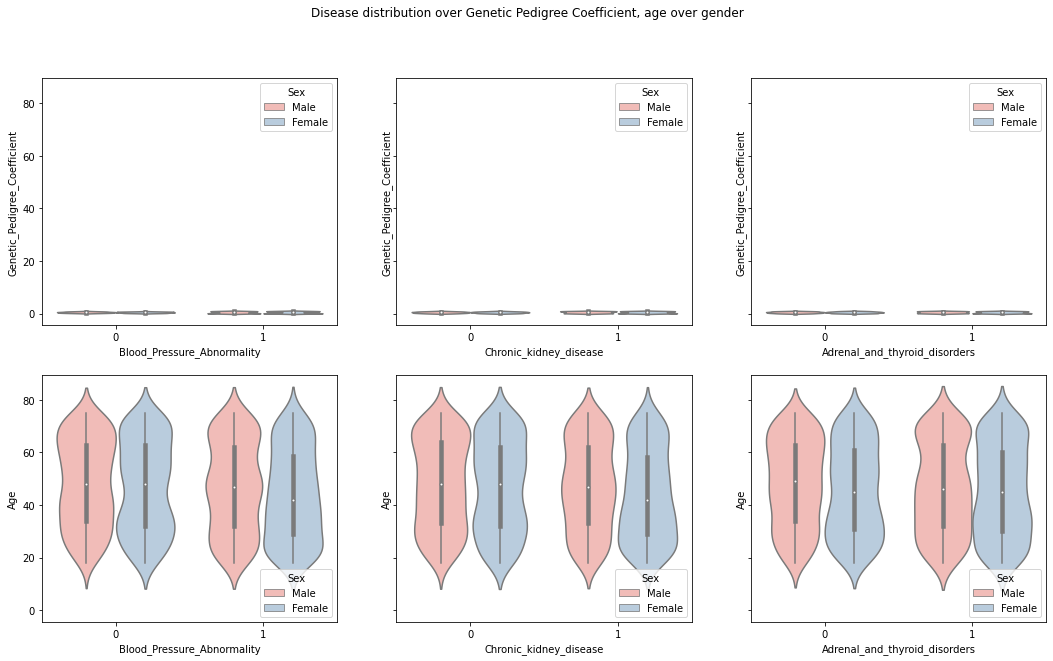

In [25]:
# overview of data
exploration.data_exploration_csv("data.csv")
exploration.Categorical_Variables_csv("data.csv")
 
# Grouped violinplot
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Disease distribution over Genetic Pedigree Coefficient, age over gender')

sns.violinplot(x="Blood_Pressure_Abnormality", y="Genetic_Pedigree_Coefficient", hue="Sex", data=data, palette="Pastel1", ax = axes[0, 0])

sns.violinplot(x="Chronic_kidney_disease", y="Genetic_Pedigree_Coefficient", hue="Sex", data=data, palette="Pastel1", ax = axes[0, 1])

sns.violinplot(x="Adrenal_and_thyroid_disorders", y="Genetic_Pedigree_Coefficient", hue="Sex", data=data, palette="Pastel1", ax = axes[0, 2])

sns.violinplot(x="Blood_Pressure_Abnormality", y="Age", hue="Sex", data=data, palette="Pastel1", ax = axes[1, 0])

sns.violinplot(x="Chronic_kidney_disease", y="Age", hue="Sex", data=data, palette="Pastel1", ax = axes[1, 1])

sns.violinplot(x="Adrenal_and_thyroid_disorders", y="Age", hue="Sex", data=data, palette="Pastel1",ax = axes[1, 2])






,Blood_Pressure_Abnormality,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress
0,1,1,1,11.28,0.90,34,23,None,1.0,0,45961,48071,NaN,2
1,0,0,0,9.75,0.23,54,33,None,NaN,0,26106,25333,205.0,3
2,1,1,0,10.79,0.91,70,49,None,NaN,0,9995,29465,67.0,2
3,0,1,0,11.00,0.43,71,50,None,NaN,0,10635,7439,242.0,1
4,1,0,0,14.17,0.83,52,19,None,NaN,0,15619,49644,397.0,2


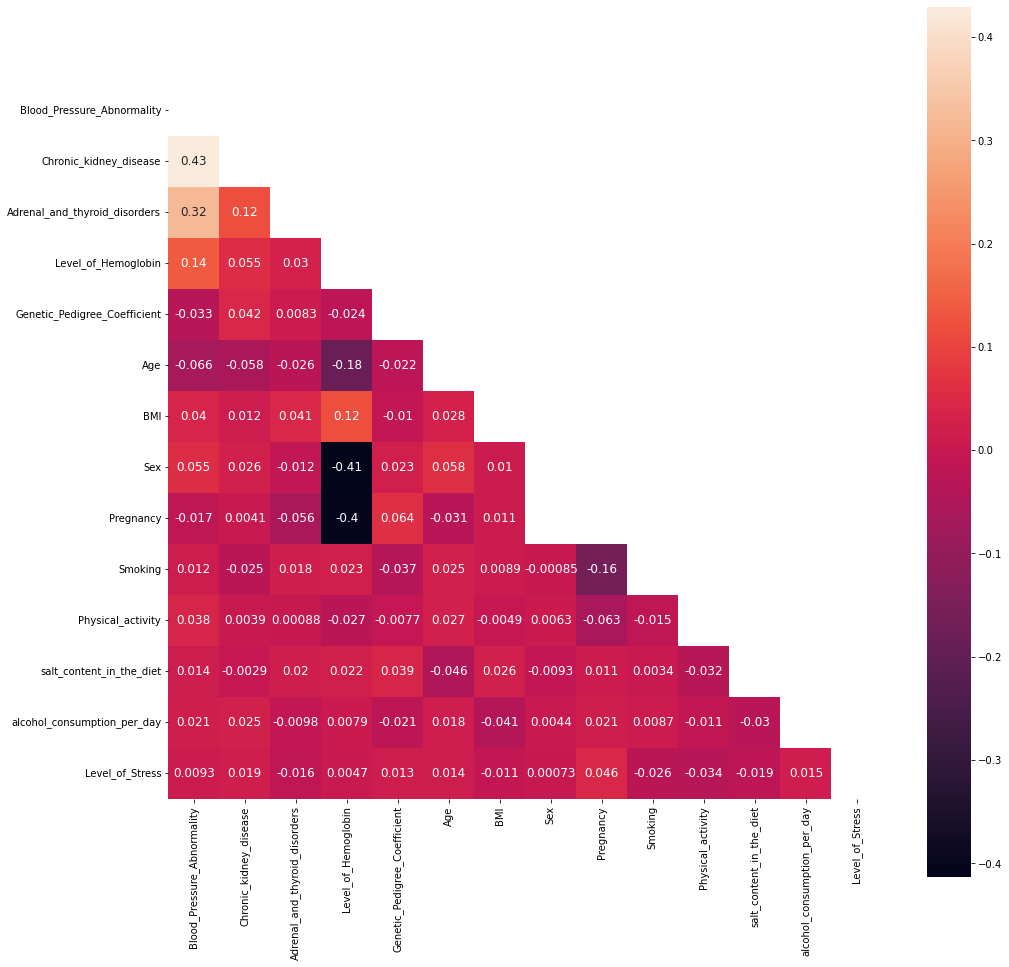

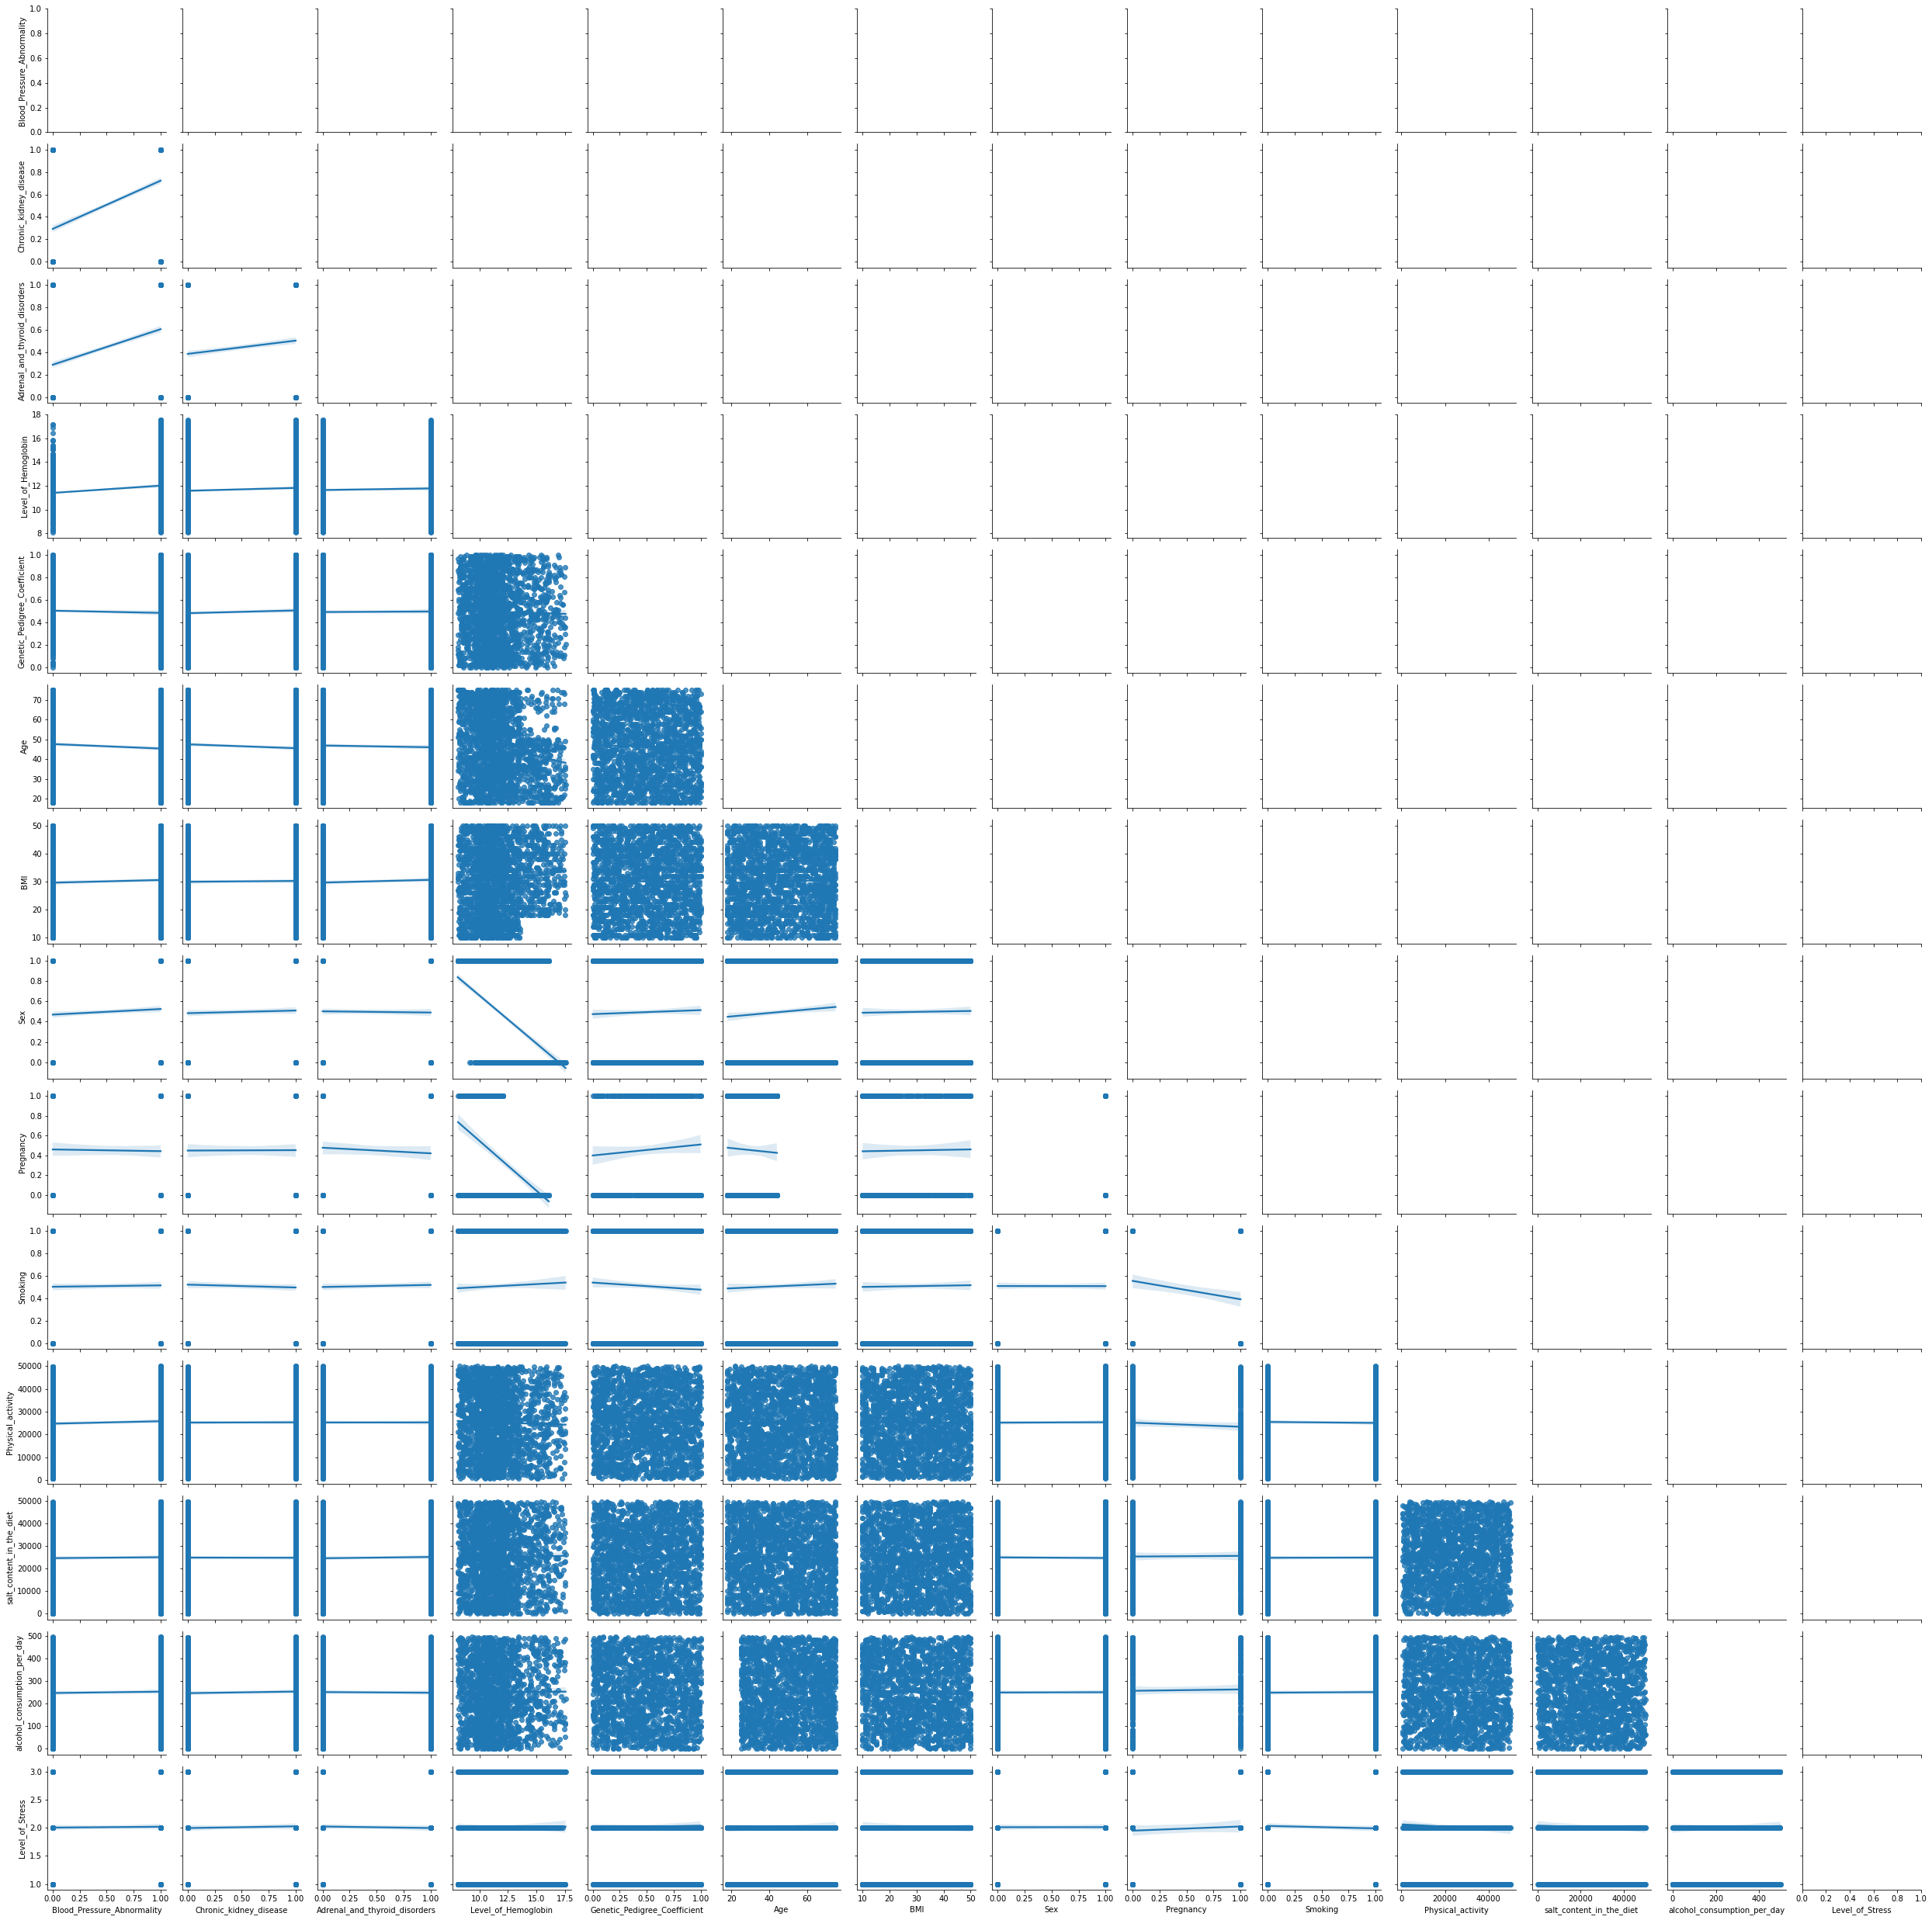

In [ ]:
# Calculate correlation between each pair of variable
corr_matrix=data.corr()
 
# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
plt.figure(figsize=(16,16))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 12}, square=True, mask=mask)




Data Preparation

Model Choosing

Training Model

Evaluting Model

Parameter Tuning

Predictions

Summary